Population Mean: 69.10546875, Bootstrap Mean: 69.17692000000001
Population Standard Deviation: 19.343201628981696, Bootstrap Std Dev: 19.010032376696216
Population Percentiles: [62. 72. 80.]
Bootstrap Percentiles: [62.9675 71.502  79.5865]


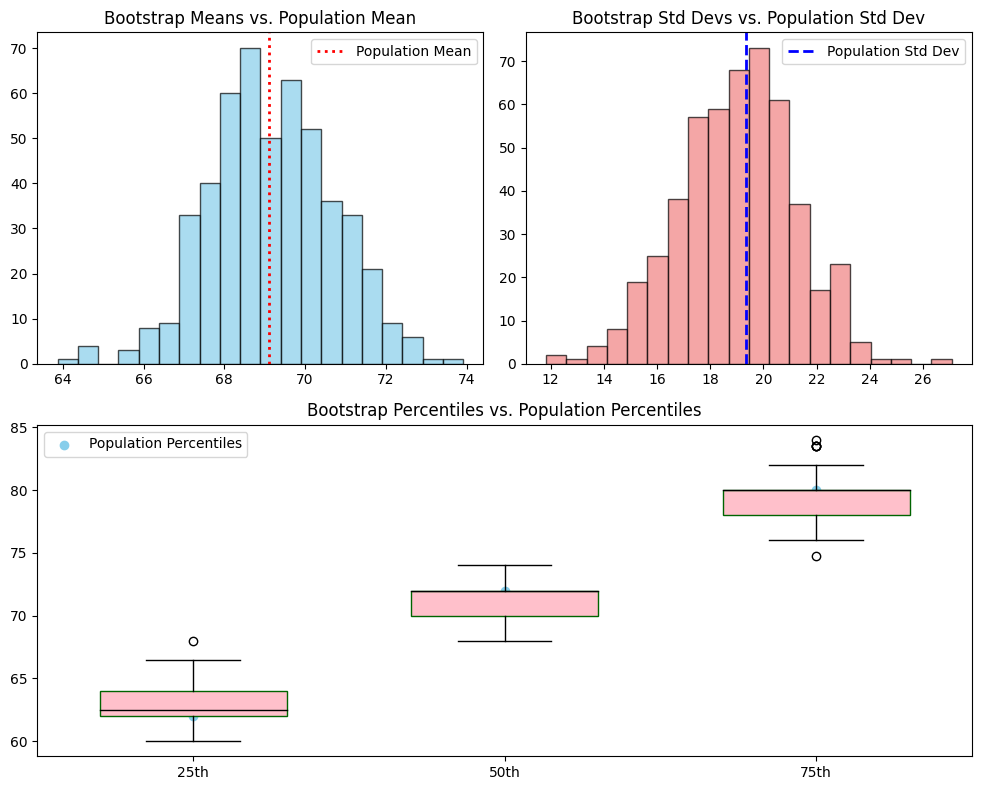

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/diabetes.csv')
population_bp = data['BloodPressure']
np.random.seed(42)
num_samples = 500
sample_size = 150
bootstrap_means = np.zeros(num_samples)
bootstrap_std_devs = np.zeros(num_samples)
bootstrap_percentiles = np.zeros((num_samples, 3))
for i in range(num_samples):
    sample = np.random.choice(population_bp, size=sample_size, replace=True)
    bootstrap_means[i] = np.mean(sample)
    bootstrap_std_devs[i] = np.std(sample)
    bootstrap_percentiles[i] = np.percentile(sample, [25, 50, 75])
population_mean = np.mean(population_bp)
population_std_dev = np.std(population_bp)
population_percentiles = np.percentile(population_bp, [25, 50, 75])
print(f"Population Mean: {population_mean}, Bootstrap Mean: {np.mean(bootstrap_means)}")
print(f"Population Standard Deviation: {population_std_dev}, Bootstrap Std Dev: {np.mean(bootstrap_std_devs)}")
print(f"Population Percentiles: {population_percentiles}")
print(f"Bootstrap Percentiles: {np.mean(bootstrap_percentiles, axis=0)}")
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(bootstrap_means, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='dotted', linewidth=2, label='Population Mean')
plt.title('Bootstrap Means vs. Population Mean')
plt.legend()
plt.subplot(2, 2, 2)
plt.hist(bootstrap_std_devs, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(population_std_dev, color='blue', linestyle='dashed', linewidth=2, label='Population Std Dev')
plt.title('Bootstrap Std Devs vs. Population Std Dev')
plt.legend()
plt.subplot(2, 1, 2)
plt.boxplot([bootstrap_percentiles[:, 0], bootstrap_percentiles[:, 1], bootstrap_percentiles[:, 2]],
            positions=[1, 2, 3], widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='pink', color='darkgreen'),
            medianprops=dict(color='black'))
plt.scatter([1, 2, 3], population_percentiles, color='skyblue', marker='o', label='Population Percentiles')
plt.xticks([1, 2, 3], ['25th', '50th', '75th'])
plt.title('Bootstrap Percentiles vs. Population Percentiles')
plt.legend()

plt.tight_layout()
plt.show()
